## Imports

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
import time
import pandas as pd
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import seaborn as sns
from sklearn.decomposition import PCA
from make_models import get_MRI_CVAE_3D
from tqdm import tqdm
import tensorflow as tf
from rsa_funcs import fit_rsa,make_RDM,get_triu

/data/bergerar/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Load and Sort Data

In [3]:
stuff = np.load('../Assets/brain_array-440.npz')
print(list(stuff.keys()))

data = stuff['data']
control = stuff['controls']
patients = stuff['patients']
n = data.shape[0]
#print(data.shape)
#data[patients,:,:,:].shape
#data[patients].shape

data_patients = data[patients,:,:,:]
data_controls = data[control,:,:,:]

print(data_patients.shape)
print(data_controls.shape)

['data', 'controls', 'patients']
(179, 64, 64, 64)
(261, 64, 64, 64)


## CVAE

In [7]:
cvae, z_encoder, s_encoder, cvae_decoder = get_MRI_CVAE_3D(input_shape=(64,64,64,1),
                    latent_dim=2,
                    beta=1,
                    disentangle=False,
                    gamma=1,
                    bias=True,
                    batch_size = 64,
                    kernel_size = 3,
                    filters = 32,
                    intermediate_dim = 128,
                    opt=None)

## Load Weights

In [15]:
cvae.load_weights('../Assets/tf_weights_10000_AB/tf_weightsAB')

In [16]:
data_patients.shape

(179, 64, 64, 64)

In [17]:
# latent vectors
bg_features_adhd = z_encoder.predict(data_patients)[0] # returns mean,std and sample of latent vectors, we take mean here
sl_features_adhd = s_encoder.predict(data_patients)[0]

In [18]:
# latent vectors
bg_features_td = z_encoder.predict(data_controls)[0] # returns mean,std and sample of latent vectors, we take mean here
sl_features_td = s_encoder.predict(data_controls)[0]

In [19]:
reconstructions = cvae_decoder.predict(np.hstack((bg_features_adhd,sl_features_adhd)))
reconstructions = reconstructions[:,:,:,:,0]

In [20]:
reconstructions.shape

(179, 64, 64, 64)

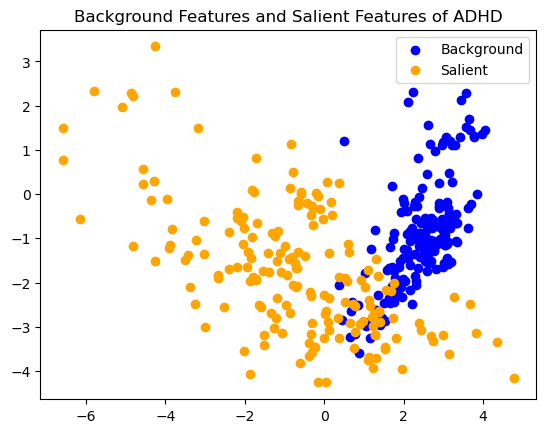

In [21]:
plt.scatter(bg_features_adhd[:,0],bg_features_adhd[:,1], label='Background', color = 'blue')
plt.scatter(sl_features_adhd[:,0],sl_features_adhd[:,1], label='Salient', color = 'orange')
plt.title('Background Features and Salient Features of ADHD')
plt.legend()
plt.show()

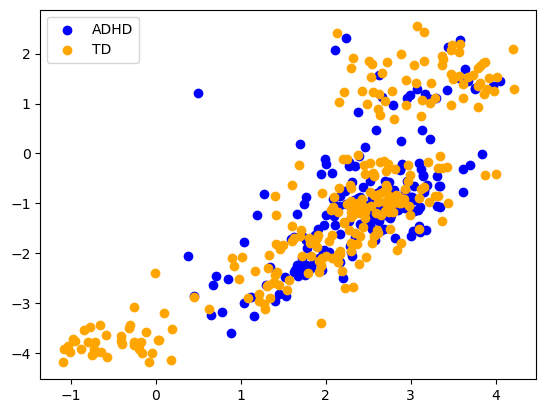

In [22]:
plt.scatter(bg_features_adhd[:,0],bg_features_adhd[:,1], label='ADHD', color = 'blue')
plt.scatter(bg_features_td[:,0],bg_features_td[:,1], label='TD', color = 'orange')
#plt.title('Background Features and Salient Features of ADHD')
plt.legend()
plt.show()

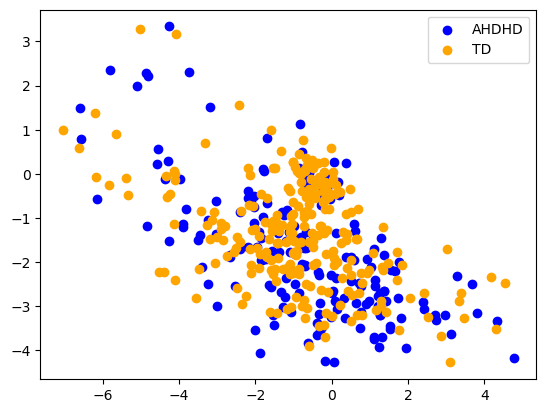

In [23]:
plt.scatter(sl_features_adhd[:,0],sl_features_adhd[:,1], label='AHDHD', color = 'blue')
plt.scatter(sl_features_td[:,0],sl_features_td[:,1], label='TD', color = 'orange')
#plt.title('Background Features and Salient Features of ADHD')
plt.legend()
plt.show()